# Exercises

Martijn Vermeulen s1129901

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

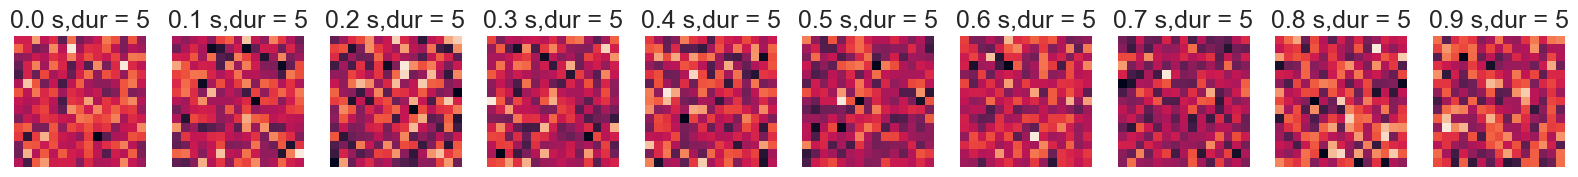

In [2]:
#duration = 50.
duration_array= [5,10,20,40,80,160,320,640]
dt = .1
std_dev = 1
vf_size = (15,15)
#n_bins = round(duration / float(dt))
n_bins_array = []
for duration in duration_array:
    n_bins_array = np.append(n_bins_array,round(duration / float(dt)))

#print(n_bins_array)
S= np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)): 
    S[i] = std_dev * np.random.randn(int(n_bins_array[i]),vf_size[0],vf_size[1])
#S = std_dev * np.random.randn(n_bins_array[0],vf_size[0],vf_size[1])
#print(np.shape(S))
# plot the first second of stimuli
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(S[0][i])
    plt.axis('off')
    plt.title(f'0.{i} s,dur = {duration_array[0]}')

Text(0, 0.5, 'y')

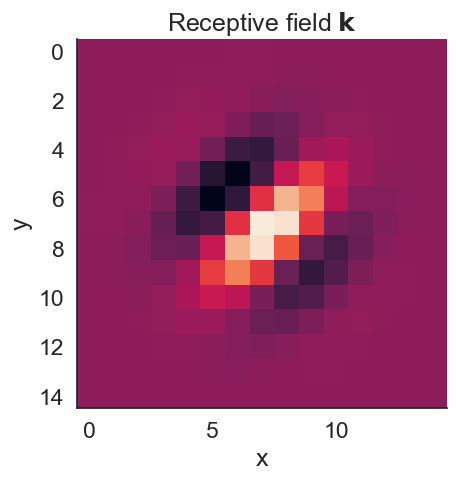

In [3]:
size = vf_size # size in pixel of our receptive field
mu = (8, 8) # center of the gabor pathc
sigma = (4,4) #size of the gabor patch
angle = 45 # orientation of the gabor patch
frequency = .085 # spatial frequency of the gabor patch
phase = 0 # pahse of the gabor pathc


xx, yy = np.meshgrid(1. + np.arange(size[0]),
                         1. + np.arange(size[1]))

# Gaussian envelope
G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
            - np.power(yy - mu[1], 2) / (2. * sigma[1]))

# spatial modulation
phi = np.deg2rad(angle)
xxr = xx * np.cos(phi)
yyr = yy * np.sin(phi)
xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
Sn = np.cos(xyr + phase)

K = G * Sn
K /= np.amax(np.abs(K))

plt.imshow(K)
plt.title(r'Receptive field $\bf{k}$')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
noise_variance = 1
offset = 2.

# flatten the matrices in to 1d array for convenience
K_flat = K.ravel()
K_flat = np.hstack((K.flat, offset))

S_flat = np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)):
    S_flat[i] = S[i].reshape(S[i].shape[0],S[i].shape[1]*S[i].shape[2])
    S_flat[i] = np.hstack((S_flat[i], np.ones((int(n_bins_array[i]), 1))))


# 1. linear stage
ks = np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)):
    ks[i] = np.dot(K_flat, S_flat[i].T)

# 2. nonlinear stage (for a linear model: f -> identity function)
#rate = ks

# add Gaussian noise centered around the "true" rate for each bin
rate = np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)):
    rate[i]= ks[i] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[i]))

#rate[0]= ks[0] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[0]))
#rate[1]= ks[1] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[1]))
#rate[2]= ks[2] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[2]))
#rate[3]= ks[3] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[3]))
#rate[4]= ks[4] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[4]))
#rate[5]= ks[5] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[5]))
#rate[6]= ks[6] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[6]))
#rate[7]= ks[7] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[7]))


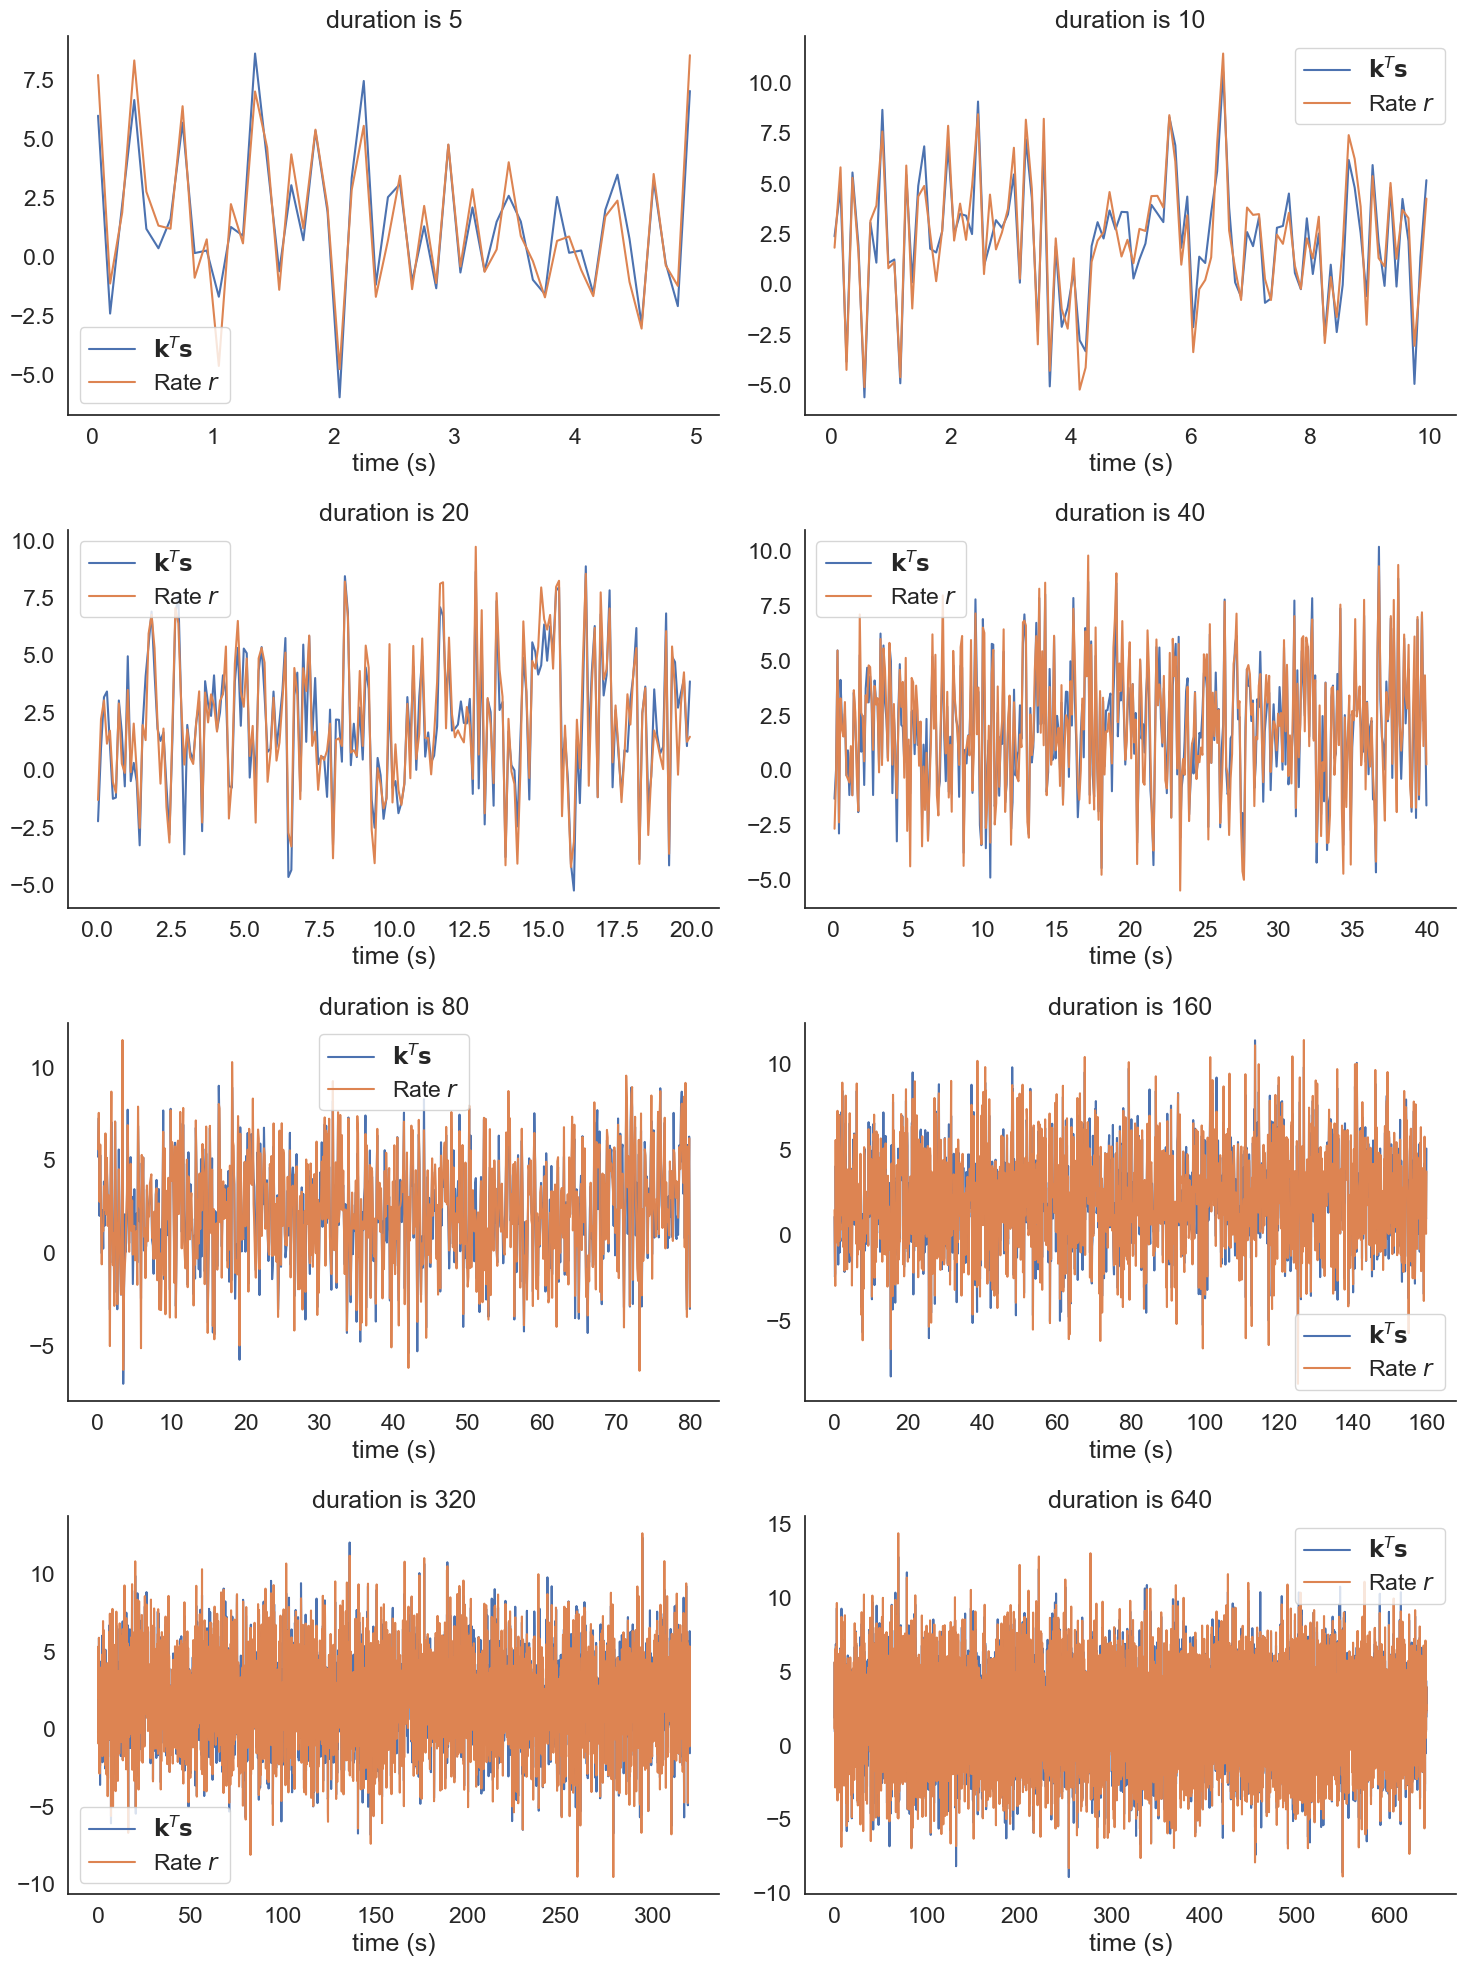

In [5]:
plt.figure(figsize=(15,20))
t = np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)):
    t[i] = (.5 + np.arange(n_bins_array[i])) * dt # bin centers
    
#for j in range(len(n_bins_array))
for j in range(len(n_bins_array)):
    plt.subplot(4,2,j+1)
    plt.plot(t[j], ks[j], '-',
           label=r'$\mathbf{k}^T\mathbf{s}$')
    plt.plot(t[j], rate[j], '-',
           label=r'Rate $r$')
    plt.xlabel('time (s)')
    plt.title(f'duration is {duration_array[j]}')
    plt.legend()
plt.tight_layout()

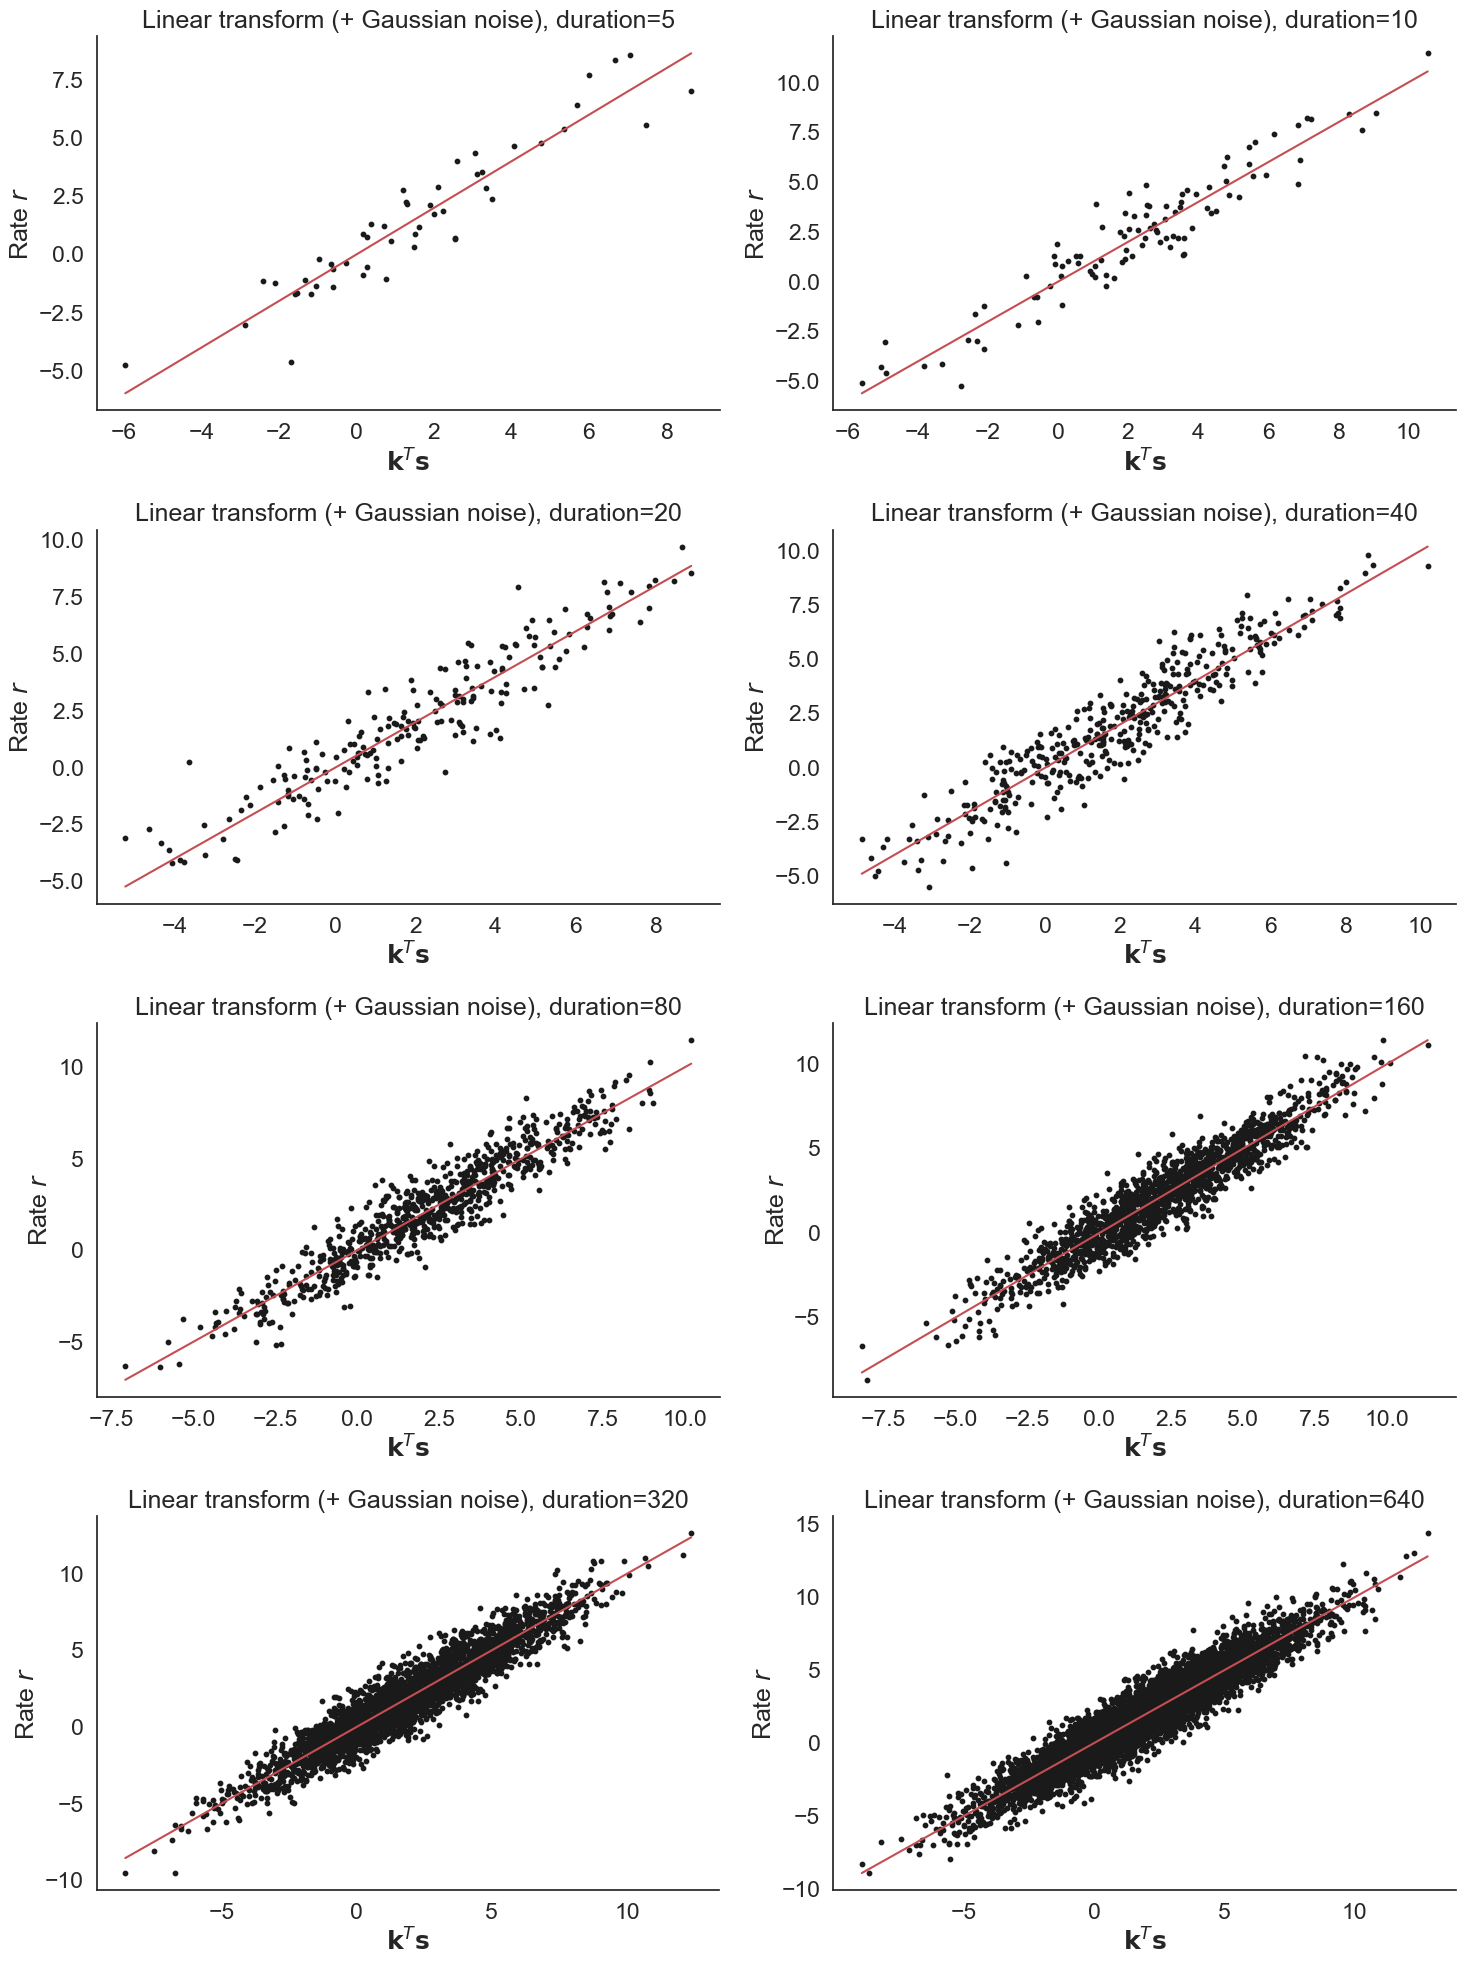

In [6]:
plt.figure(figsize=(15,20))
for j in range(len(n_bins_array)):
    xx = np.linspace(ks[j].min(), ks[j].max(), 100)
    plt.subplot(4,2,j+1)
    plt.plot(xx, xx, 'r-') # relationship between input and output
    plt.scatter(ks[j], rate[j], s=10, c=[3*[.1]])
    plt.xlabel(r'$\mathbf{k}^T \mathbf{s}$')
    plt.ylabel(r'Rate $r$')
    plt.title(f'Linear transform (+ Gaussian noise), duration={duration_array[j]}')
    #plt.title(f'Linear transform (+ Gaussian noise)')
plt.tight_layout()

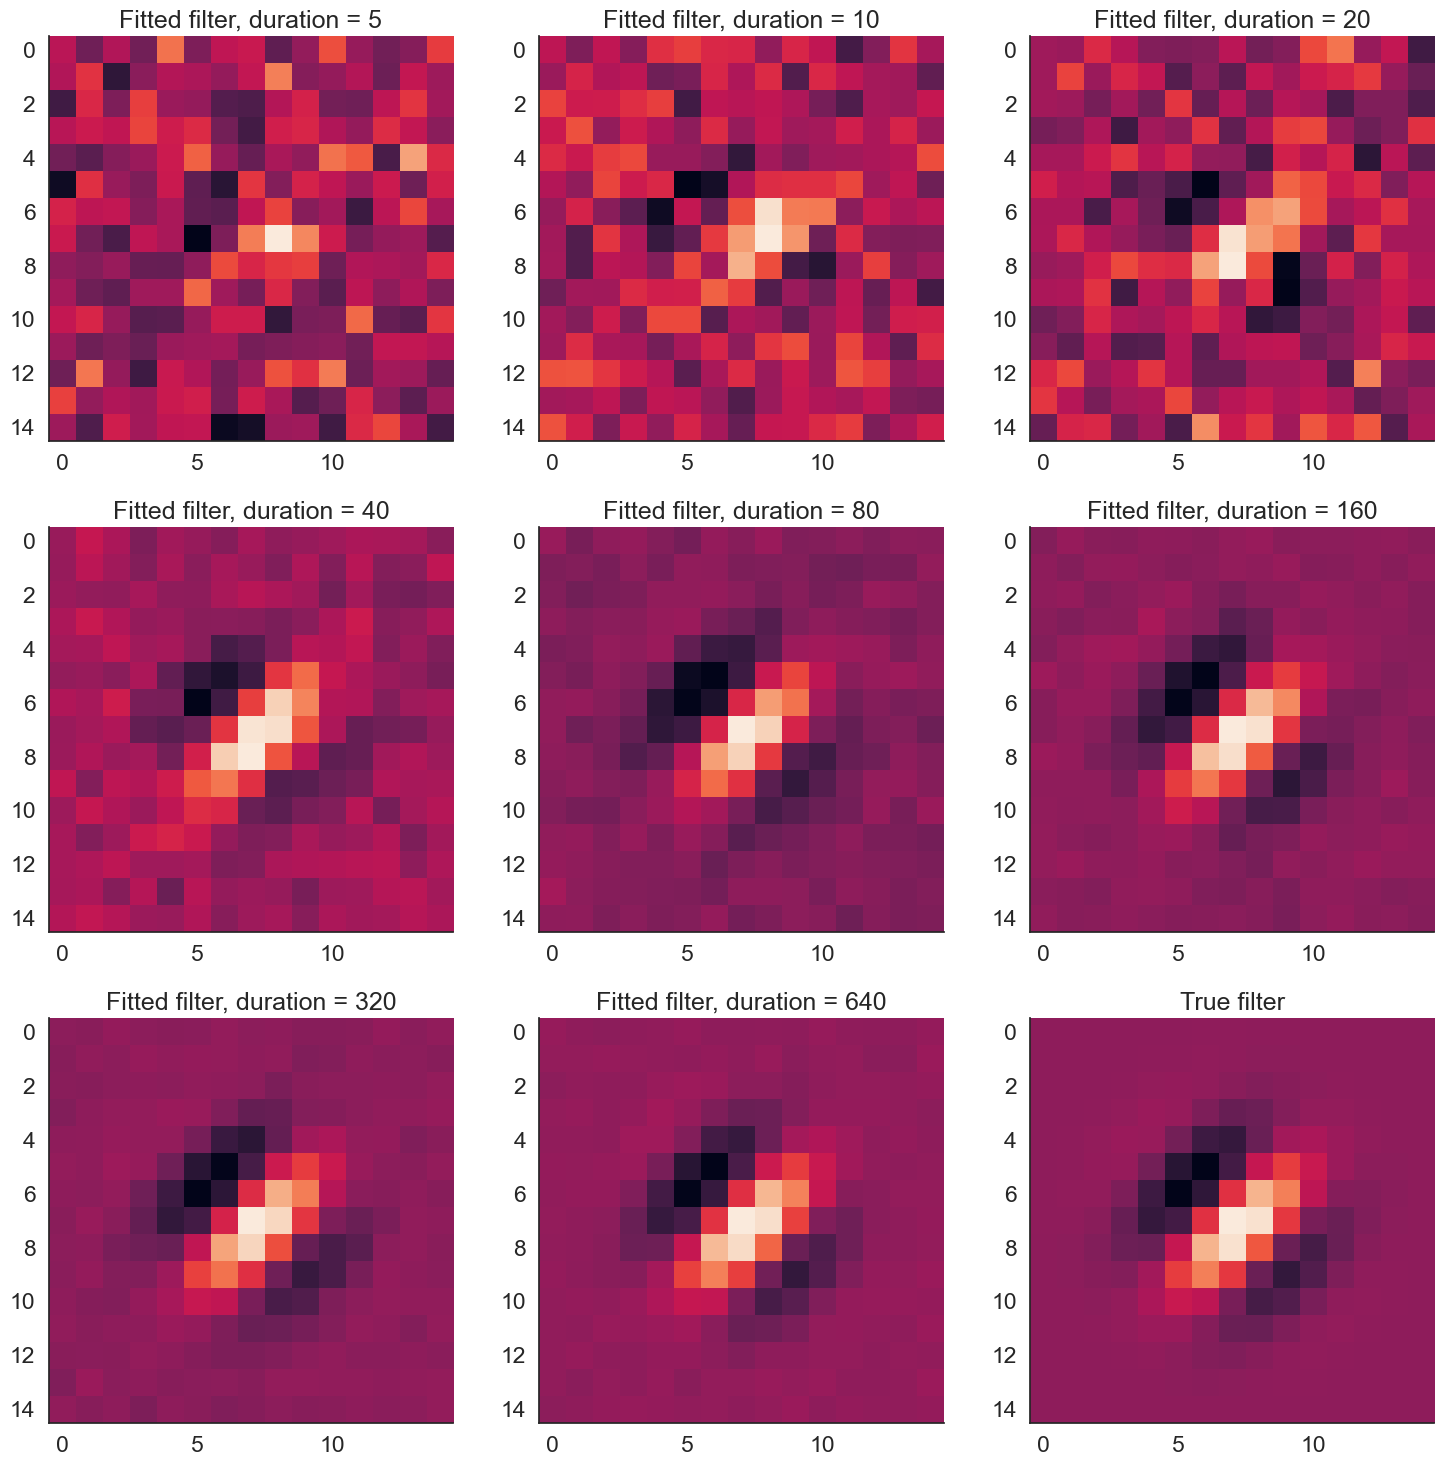

In [7]:
#S_flat = S_flat.T
K_hat = np.empty(len(duration_array), dtype=object)
for i in range(len(n_bins_array)):
    K_hat[i] = np.linalg.pinv(S_flat[i].T @ S_flat[i]) @ (S_flat[i].T @ rate[i])
    K_hat[i] = K_hat[i][:-1].reshape(vf_size)

plt.figure(figsize=(15,15))
for i in range(len(n_bins_array)):
    
    plt.subplot(3,3,i+1)
    plt.title(f'Fitted filter, duration = {duration_array[i]}')
    plt.imshow(K_hat[i])
plt.subplot(3,3,i+2)
plt.title('True filter')
plt.imshow(K)
plt.tight_layout()

Increasing the duration the fitted filter also increases the accuracy of the fitted filter.

In [8]:
#Make a finction that can simulate the RF for different durations

def simulate_rf():
    #duration_array= [5,10,20,40,80,160,320,640]
    duration_array = np.linspace(1,1000,100)
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    #n_bins = round(duration / float(dt))
    n_bins_array = []
    for duration in duration_array:
        n_bins_array = np.append(n_bins_array,round(duration / float(dt)))

    #print(n_bins_array)
    S= np.empty(len(duration_array), dtype=object)
    for i in range(len(n_bins_array)): 
        S[i] = std_dev * np.random.randn(int(n_bins_array[i]),vf_size[0],vf_size[1])
    
    
    noise_variance = 1
    offset = 2.

    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))

    S_flat = np.empty(len(duration_array), dtype=object)
    for i in range(len(n_bins_array)):
        S_flat[i] = S[i].reshape(S[i].shape[0],S[i].shape[1]*S[i].shape[2])
        S_flat[i] = np.hstack((S_flat[i], np.ones((int(n_bins_array[i]), 1))))


    # 1. linear stage
    ks = np.empty(len(duration_array), dtype=object)
    for i in range(len(n_bins_array)):
        ks[i] = np.dot(K_flat, S_flat[i].T)

    # 2. nonlinear stage (for a linear model: f -> identity function)
    #rate = ks

    # add Gaussian noise centered around the "true" rate for each bin
    rate = np.empty(len(duration_array), dtype=object)
    for i in range(len(n_bins_array)):
        rate[i]= ks[i] + np.sqrt(noise_variance)* np.random.randn(int(n_bins_array[i]))

    
    K_hat = np.empty(len(duration_array), dtype=object)
    for i in range(len(n_bins_array)):
        K_hat[i] = np.linalg.pinv(S_flat[i].T @ S_flat[i]) @ (S_flat[i].T @ rate[i])
        K_hat[i] = K_hat[i][:-1].reshape(vf_size)
    





    return K_hat

In [9]:
from scipy import stats
def Pearson_correlation(K_true,K_fitted):
    cc = (K_true.T)*(K_fitted)/((np.linalg.norm(K_true))*(np.linalg.norm(K_fitted)))
    return cc

def Pearson_correlation2(K_true,K_fitted):
    cc = (np.dot(K_true.ravel(),K_fitted.ravel()))/((np.linalg.norm(K_true))*(np.linalg.norm(K_fitted)))
    return cc

In [10]:
stats.pearsonr(K.ravel(),K_hat[0].ravel())

PearsonRResult(statistic=0.3655424961848539, pvalue=1.6108331629082344e-08)

In [11]:
Pearson_average = np.zeros(len(n_bins_array))
Pearson_average_scipy = np.zeros(len(n_bins_array))
for j in range(10):
    Pearson = []
    Pearson_scipy = []
    K_hat = simulate_rf()
    for i in range(len(n_bins_array)):
        Pearson = np.append(Pearson,Pearson_correlation2(K,K_hat[i]))
        Pearson_scipy = np.append(Pearson_scipy,stats.pearsonr(K.ravel(),K_hat[i].ravel())[0])
        #Pearson_scipy = np.append(Pearson_scipy,stats.pearsonr(K.ravel(),K_hat.ravel()[i]))
    Pearson_average = np.add(Pearson_average,Pearson)
    Pearson_average_scipy = np.add(Pearson_average_scipy,Pearson_scipy)

Pearson_average /=10
Pearson_average_scipy /=10                     

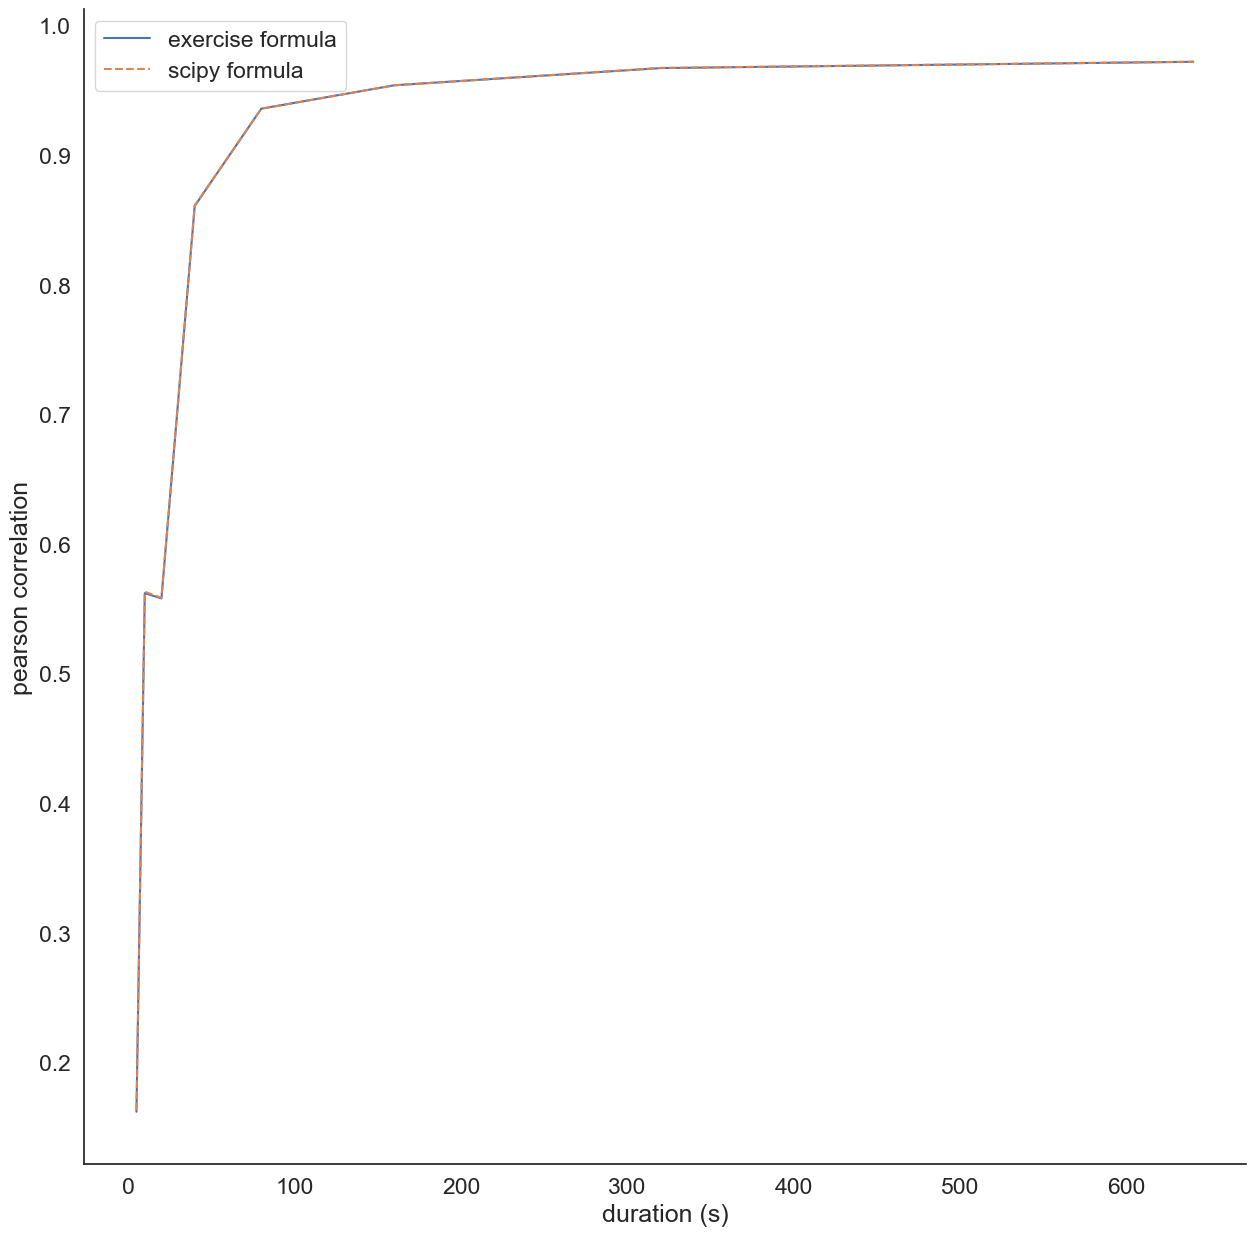

In [12]:
plt.figure(figsize=(15,15))
plt.plot(duration_array,Pearson_average, label= 'exercise formula')
plt.plot(duration_array,Pearson_average_scipy, label = 'scipy formula',linestyle='dashed')
plt.xlabel('duration (s)')
#plt.xscale('log')
plt.ylabel('pearson correlation')
plt.legend()

As the recording duration is increased the Pearson correlation increases untill it asymptotes, under 1. This means that as the duration increases the simulation gets closer to the real RF. I don't know why there is a weird kink in the graph.

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


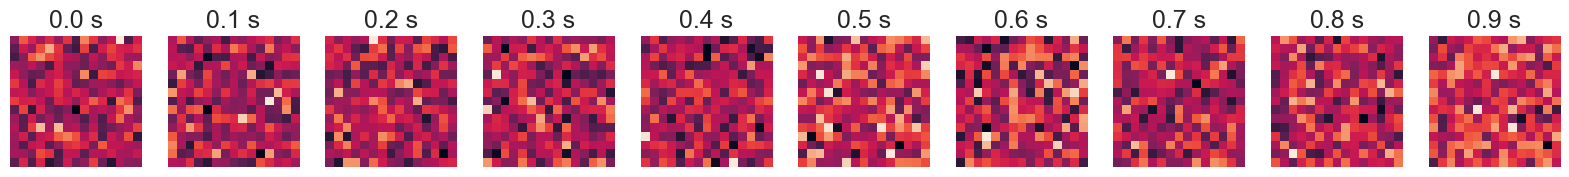

In [14]:
duration = 100.
dt = .1
std_dev = 1
vf_size = (15,15)
n_bins = round(duration / float(dt))


S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

# plot the first second of stimuli
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(S[i])
    plt.axis('off')
    plt.title(f'0.{i} s')


Text(0, 0.5, 'y')

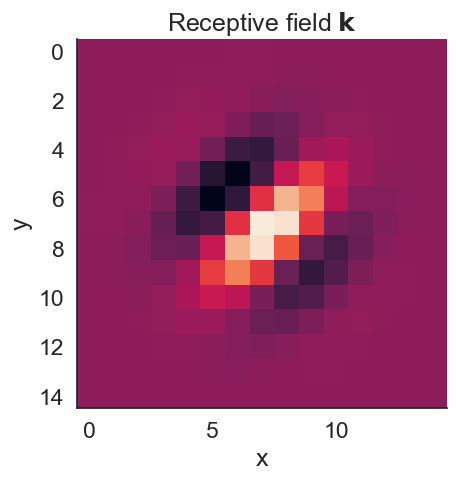

In [15]:
size = vf_size # size in pixel of our receptive field
mu = (8, 8) # center of the gabor pathc
sigma = (4,4) #size of the gabor patch
angle = 45 # orientation of the gabor patch
frequency = .085 # spatial frequency of the gabor patch
phase = 0 # pahse of the gabor pathc


xx, yy = np.meshgrid(1. + np.arange(size[0]),
                         1. + np.arange(size[1]))

# Gaussian envelope
G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
            - np.power(yy - mu[1], 2) / (2. * sigma[1]))

# spatial modulation
phi = np.deg2rad(angle)
xxr = xx * np.cos(phi)
yyr = yy * np.sin(phi)
xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
Sn = np.cos(xyr + phase)

K = G * Sn
K /= np.amax(np.abs(K))

plt.imshow(K)
plt.title(r'Receptive field $\bf{k}$')
plt.xlabel('x')
plt.ylabel('y')

In [16]:
#noise_variance = 1
noise_variance_array = [0,2,4,6,8,10]
offset = 2.

# flatten the matrices in to 1d array for convenience
K_flat = K.ravel()
K_flat = np.hstack((K.flat, offset))

S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


# 1. linear stage
ks = np.dot(K_flat, S_flat.T)

# 2. nonlinear stage (for a linear model: f -> identity function)

rate = np.empty(len(noise_variance_array), dtype=object)
for i in range(len(noise_variance_array)):
    rate[i]= ks + np.sqrt(noise_variance_array[i])* np.random.randn(n_bins)

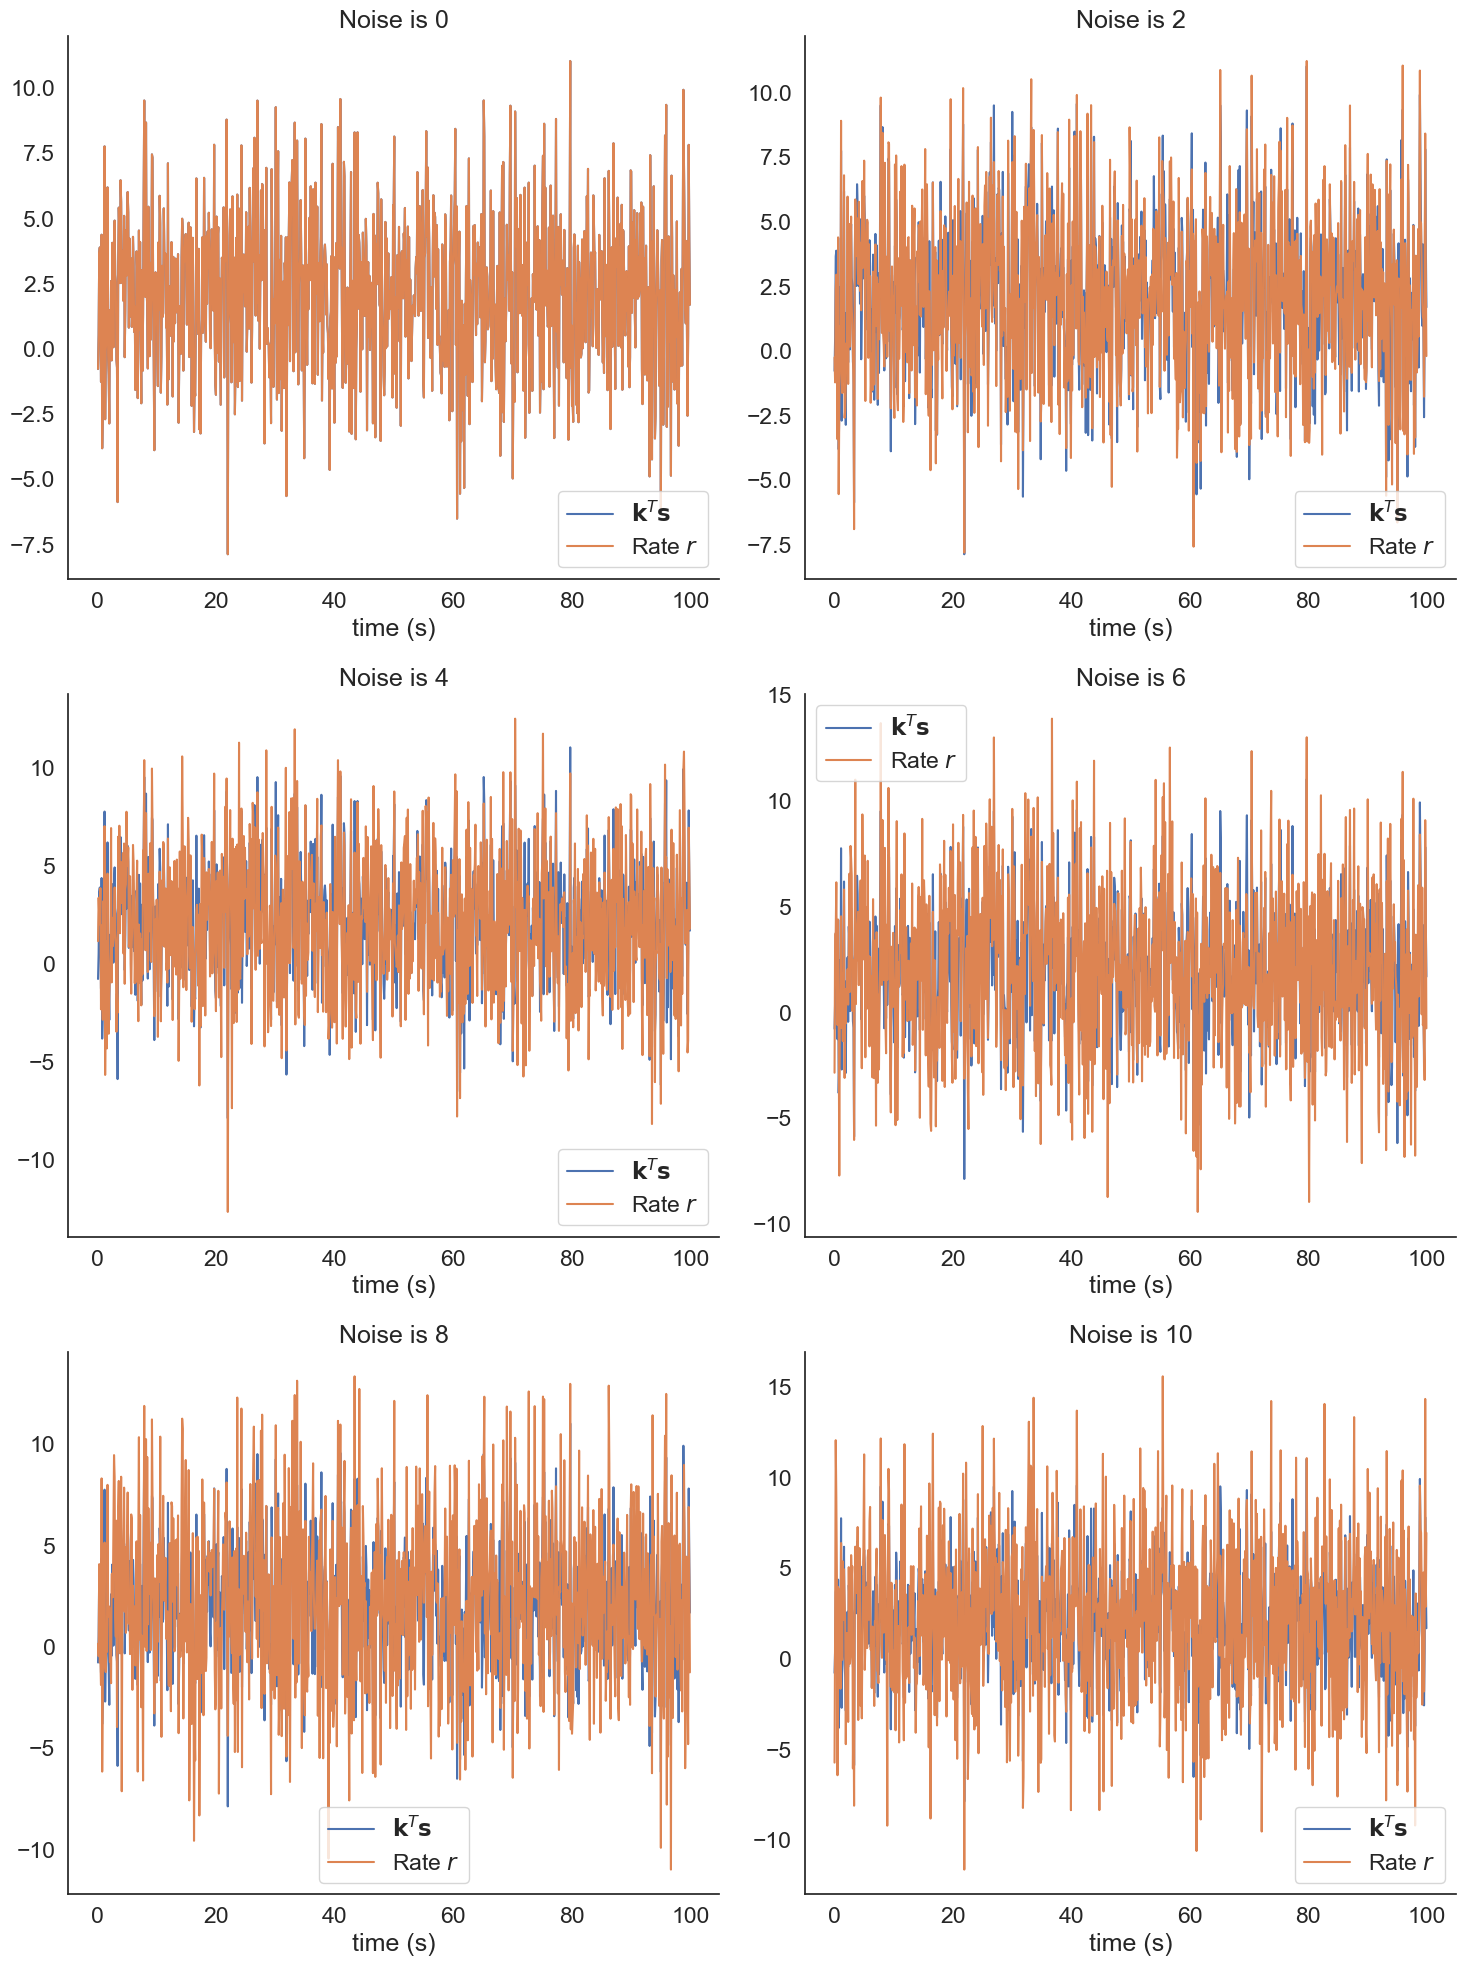

In [17]:
plt.figure(figsize=(15,20))
t = (.5 + np.arange(n_bins)) * dt # bin centers
#for j in range(len(n_bins_array))
for j in range(len(noise_variance_array)):
    plt.subplot(3,2,j+1)
    plt.plot(t, ks, '-',
           label=r'$\mathbf{k}^T\mathbf{s}$')
    plt.plot(t, rate[j], '-',
           label=r'Rate $r$')
    plt.xlabel('time (s)')
    plt.title(f'Noise is {noise_variance_array[j]}')
    plt.legend()
plt.tight_layout()

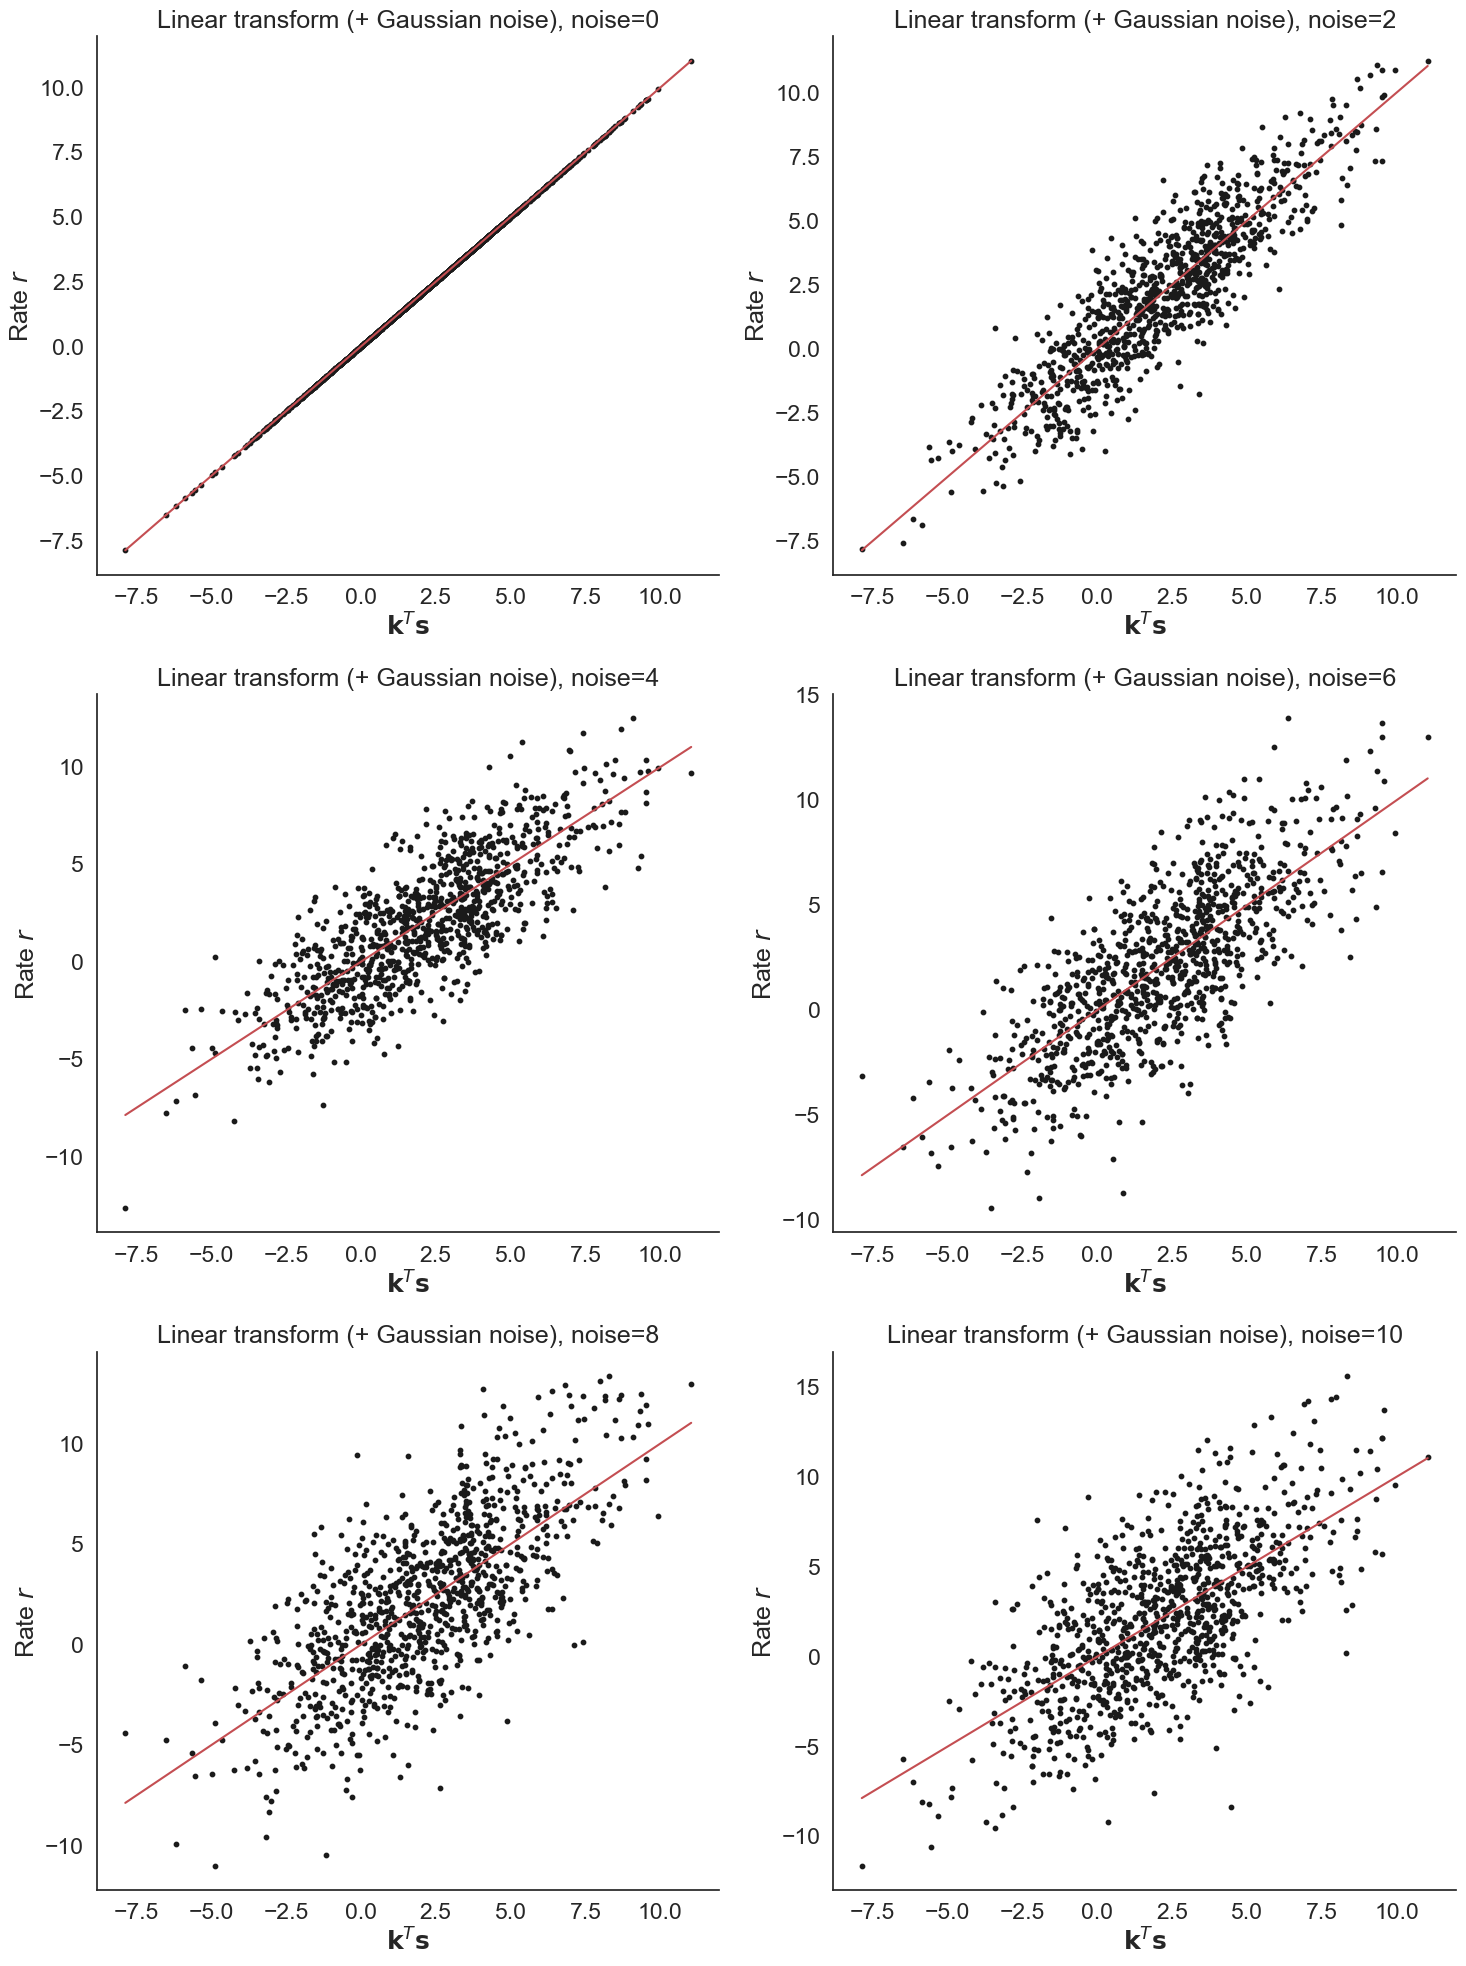

In [18]:
plt.figure(figsize=(15,20))
for j in range(len(noise_variance_array)):
    xx = np.linspace(ks.min(), ks.max(), 100)
    plt.subplot(3,2,j+1)
    plt.plot(xx, xx, 'r-') # relationship between input and output
    plt.scatter(ks, rate[j], s=10, c=[3*[.1]])
    plt.xlabel(r'$\mathbf{k}^T \mathbf{s}$')
    plt.ylabel(r'Rate $r$')
    plt.title(f'Linear transform (+ Gaussian noise), noise={noise_variance_array[j]}')
    #plt.title(f'Linear transform (+ Gaussian noise)')
plt.tight_layout()

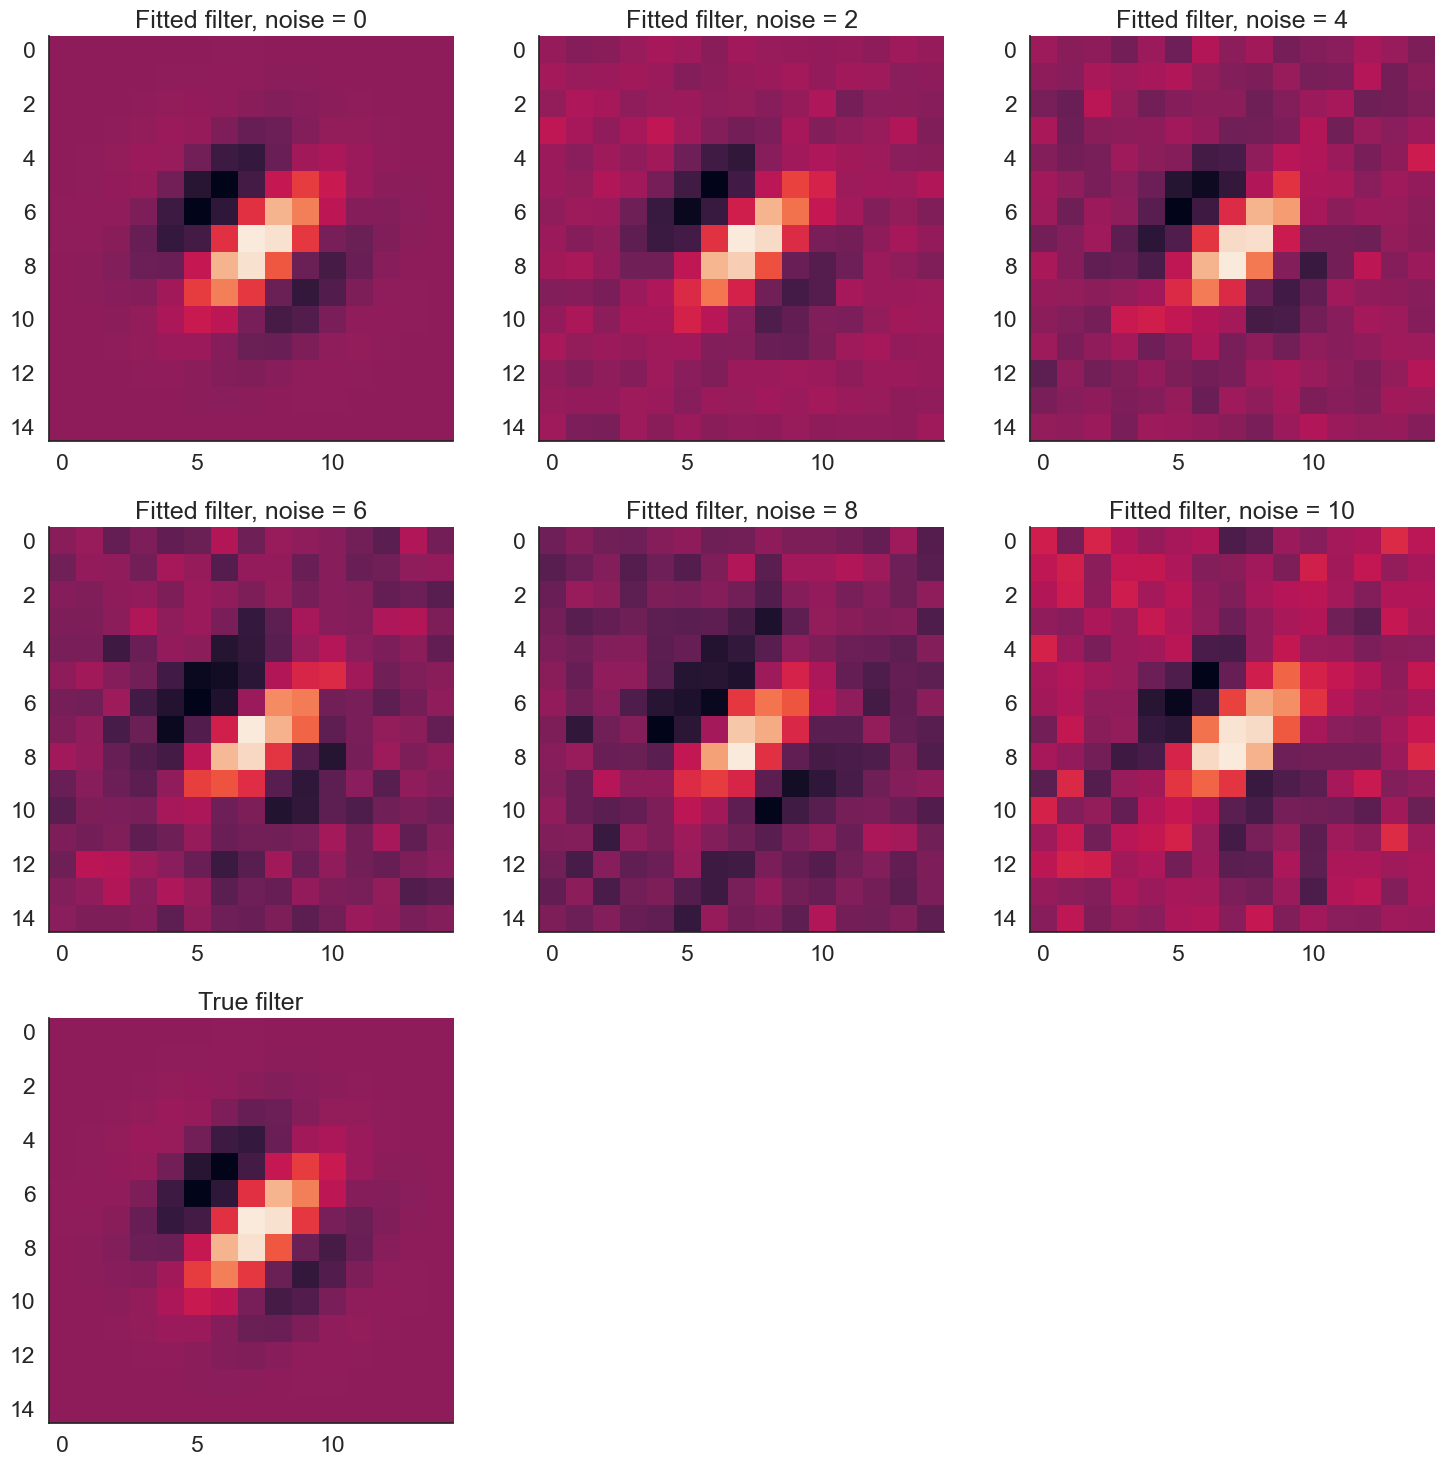

In [19]:
#S_flat = S_flat.T
K_hat = np.empty(len(noise_variance_array), dtype=object)
for i in range(len(noise_variance_array)):
    K_hat[i] = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate[i])
    K_hat[i] = K_hat[i][:-1].reshape(vf_size)

plt.figure(figsize=(15,15))
for i in range(len(noise_variance_array)):
    
    plt.subplot(3,3,i+1)
    plt.title(f'Fitted filter, noise = {noise_variance_array[i]}')
    plt.imshow(K_hat[i])
plt.subplot(3,3,i+2)
plt.title('True filter')
plt.imshow(K)
plt.tight_layout()

In [20]:
def Pearson_correlation2(K_true,K_fitted):
    cc = (np.dot(K_true.ravel(),K_fitted.ravel()))/((np.linalg.norm(K_true))*(np.linalg.norm(K_fitted)))
    return cc

In [21]:
def simulate_rf_noise():
    duration = 100.
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))


    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    size = vf_size # size in pixel of our receptive field
    mu = (8, 8) # center of the gabor pathc
    sigma = (4,4) #size of the gabor patch
    angle = 45 # orientation of the gabor patch
    frequency = .085 # spatial frequency of the gabor patch
    phase = 0 # pahse of the gabor pathc


    xx, yy = np.meshgrid(1. + np.arange(size[0]),
                             1. + np.arange(size[1]))

    # Gaussian envelope
    G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                - np.power(yy - mu[1], 2) / (2. * sigma[1]))

    # spatial modulation
    phi = np.deg2rad(angle)
    xxr = xx * np.cos(phi)
    yyr = yy * np.sin(phi)
    xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
    Sn = np.cos(xyr + phase)

    K = G * Sn
    K /= np.amax(np.abs(K))
    
    noise_variance_array = [0,2,4,6,8,10]
    #noise_variance_array = np.linspace(1,100,100)
    offset = 2.

    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))

    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)

    # 2. nonlinear stage (for a linear model: f -> identity function)

    rate = np.empty(len(noise_variance_array), dtype=object)
    for i in range(len(noise_variance_array)):
        rate[i]= ks + np.sqrt(noise_variance_array[i])* np.random.randn(n_bins)
    
    
    t = (.5 + np.arange(n_bins)) * dt # bin centers
    
    
    K_hat = np.empty(len(noise_variance_array), dtype=object)
    for i in range(len(noise_variance_array)):
        K_hat[i] = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate[i])
        K_hat[i] = K_hat[i][:-1].reshape(vf_size)
        
    return K_hat, K

In [22]:
num_of_sim = 100
Pearson_array = np.empty(num_of_sim, dtype=object)
for i in range(num_of_sim):
    Pearson = []
    K_hat_noise , K = simulate_rf_noise()
    for j in range(len(noise_variance_array)):
        Pearson = np.append(Pearson,Pearson_correlation2(K_hat_noise[j] , K) )
    
    Pearson_array[i] = Pearson
    
Pearson_plot_mean = []
Pearson_plot_std = []
for i in range(len(noise_variance_array)):
    pearson_one_noise = []
    for j in range(num_of_sim):
        pearson_one_noise = np.append(pearson_one_noise,Pearson_array[j][i])
        #print(pearson_one_noise)
    Pearson_plot_mean = np.append(Pearson_plot_mean,np.mean(pearson_one_noise))
    Pearson_plot_std = np.append(Pearson_plot_std,np.std(pearson_one_noise))

Text(0, 0.5, 'Pearson coefficient')

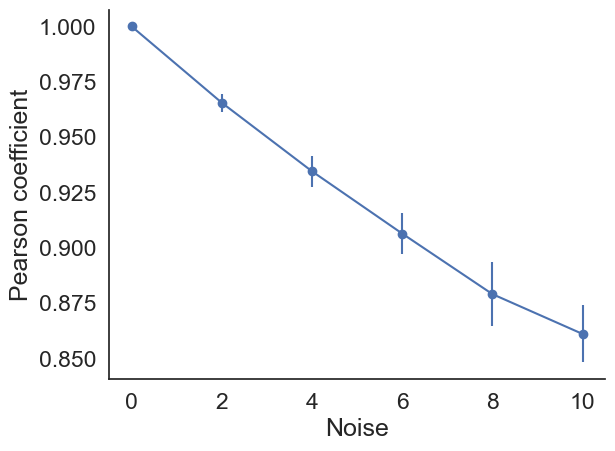

In [25]:
plt.errorbar(noise_variance_array,Pearson_plot_mean,Pearson_plot_std, fmt = 'o-')
plt.xlabel('Noise')
plt.ylabel('Pearson coefficient')

## Exercise 3
---
Look at the analytical derivation of the log-likelihood for the poisson GLM.
Which of the terms are required for maximizing the likelihood with respect to $\mathbf{k}$ and which terms can be ignored? **Note:** due to the independence of spikes in the different bins, the likelihood can be written as $P(R | S, \mathbf{k}) = \prod_t^T P(r_t | \mathbf{s}_t, \mathbf{k})$. The log turns the product into a sum which makes life much easier. 




## Exercise 4
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 